In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Load dataset
df=pd.read_csv('cereal.csv')

# Basic info
df.info()

# Preview data
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     str    
 1   mfr       77 non-null     str    
 2   type      77 non-null     str    
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), str(3)
memory usage: 9.8 KB


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
# Replace -1 with NaN
df["sugars"] = df["sugars"].replace(-1, np.nan)
df["potass"] = df["potass"].replace(-1, np.nan)

# Fill missing values with column mean
df["sugars"] = df["sugars"].fillna(df["sugars"].mean())
df["potass"] = df["potass"].fillna(df["potass"].mean())

#Convert Sodium & Potassium from mg → grams
df["sodium_g"] = df["sodium"] / 1000
df["potass_g"] = df["potass"] / 1000

#Create the health score
df["health_score"] = (
    df["fiber"] * 2 +
    df["protein"] * 1.5 +
    df["potass"] * 0.01 -
    df["sugars"] * 1.5 -
    df["fat"] * 1 -
    df["sodium"] * 0.01
)

Correlation between sugar and rating: -0.76


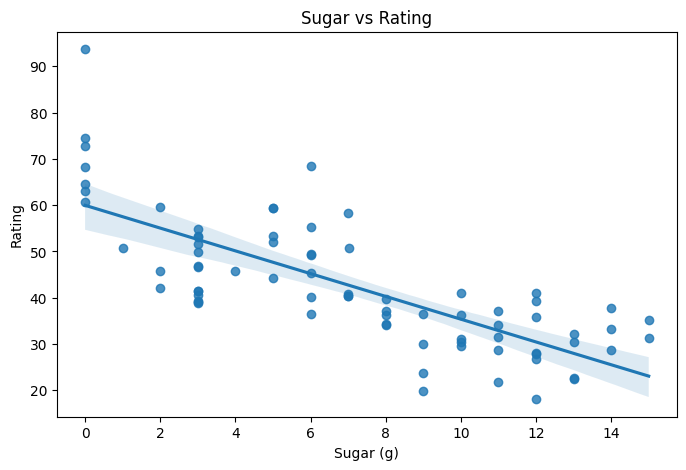

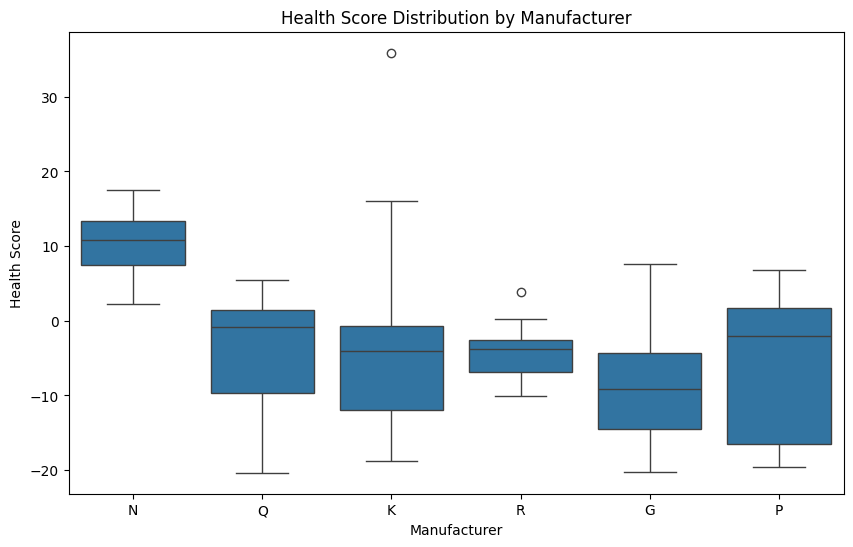

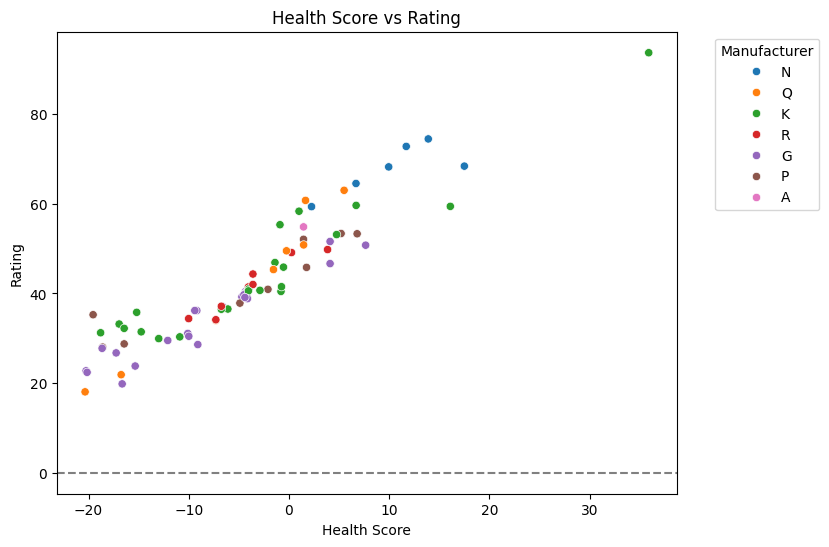

In [5]:
#Sugar vs. Rating Correlation
correlation = df["sugars"].corr(df["rating"])
print(f"Correlation between sugar and rating: {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.regplot(data=df, x="sugars", y="rating")
plt.title("Sugar vs Rating")
plt.xlabel("Sugar (g)")
plt.ylabel("Rating")
plt.show()

#Count of cereals by manufacturer
df["mfr"].value_counts()

mfr_counts = df["mfr"].value_counts()
big_mfrs = mfr_counts[mfr_counts > 5].index
df_big = df[df["mfr"].isin(big_mfrs)]

#Summary stats
df_big.groupby("mfr")[["health_score", "rating", "sugars"]].agg(["mean", "min", "max", "std"])

#Boxplot of health score by manufacturer
plt.figure(figsize=(10,6))
sns.boxplot(data=df_big, x="mfr", y="health_score")
plt.title("Health Score Distribution by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Health Score")
plt.show()

#Top 10 cereals by sugar content
top_sugar = df.sort_values(by="sugars", ascending=False)
top_sugar[["name", "sugars", "rating", "health_score"]].head(10)

#Scatter plot of health score vs rating colored by manufacturer
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="health_score", y="rating", hue="mfr")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Health Score vs Rating")
plt.xlabel("Health Score")
plt.ylabel("Rating")
plt.legend(title="Manufacturer", bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
# Interactive comparison of two cereals by health score
cereal_options = df["name"].unique()
cereal1 = widgets.Dropdown(options=cereal_options, description="Cereal 1:")
cereal2 = widgets.Dropdown(options=cereal_options, description="Cereal 2:")

def compare_health_score(c1, c2):
    filtered = df[df["name"].isin([c1, c2])]

    plt.figure(figsize=(6,4))
    ax = sns.barplot(data=filtered, x="name", y="health_score", palette="Greens")

    # Add labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3)

    # Adjust y-axis for negatives
    min_val = filtered["health_score"].min()
    max_val = filtered["health_score"].max()
    plt.ylim(min_val - 2, max_val + 2)

    plt.axhline(0, linestyle="--", color="gray")
    plt.title("Health Score Comparison")
    plt.ylabel("Health Score")
    plt.xlabel("Cereal")
    plt.show()

widgets.interact(compare_health_score, c1=cereal1, c2=cereal2);

interactive(children=(Dropdown(description='Cereal 1:', options=('100% Bran', '100% Natural Bran', 'All-Bran',…